# Image Classification - Lab

## Introduction

Now that you have a working knowledge of CNNs and have practiced implementing associated techniques in Keras, its time to put all of those skills together. In this lab, you'll work to complete a Kaggle competition on classifying dog breeds.

https://www.kaggle.com/c/dog-breed-identification

## Objectives

You will be able to:
* Independently design and build a CNN for image classifcation tasks
* Compare and apply multiple techniques for tuning a model including data augmentation and adapting pretrained models

## Download and Load the Data

Start by downloading the data locally and loading it into a Pandas DataFrame. Be forewarned that this dataset is fairly large and it is advisable to close other memory intensive applications.

The data can be found here:

https://www.kaggle.com/c/dog-breed-identification/data

It's easiest if you download the data into this directory on your local computer. From there, be sure to uncompress the folder and subfolders. If you download the data elsewhere, be sure to modify the file path when importing the file below.

In [1]:
# No code persay, but download and decompress the data.

## Preprocessing

Now that you've downloaded the data, its time to prepare it for some model building! You'll notice that the current structure provided is not the same as our lovely preprocessed folders that you've been given to date. Instead, you have one large training folder with images and a csv file with labels associated with each of these file types. 

Use this to create a directory substructure for a train-validation-test split as we have done previously. Also recall that you'll also want to use one-hot encoding as you are now presented with a multi-class problem as opposed to simple binary classification.

In [2]:
# Your code here; open the labels.csv file stored in the zip file
import pandas as pd

In [3]:
ls dog_breeds/train/ | head -5

Parameter format not correct - "rain".


In [4]:
df = pd.read_csv('dog_breeds/labels.csv')
df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [5]:
print('Unique Breeds Count:', df.breed.nunique())
print('\n')
print(df.breed.value_counts()[:10])

Unique Breeds Count: 120


scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
shih-tzu                112
great_pyrenees          111
pomeranian              111
basenji                 110
samoyed                 109
Name: breed, dtype: int64



In order to input the data into our standard pipeline, you'll need to organize the image files into a nested folder structure. At the top level will be a folder for the training data, a folder for the validation data, and a folder for the testing data. Within these top directory folders, you'll then need to create a folder for each of the categorical classes (in this case, dog breeds). Finally, within these category folders you'll then place each of the associated image files. To save time, do this for just 3 of the dog breeds such as 'boston_bull', 'toy_poodle', and 'scottish_deerhound'.

You're nested file structure should look like this:
* train
    * category1
    * category2
    * category3
    ...
* val
    * category1
    * category2
    * category3
    ...
* test 
    * category1
    * category2
    * category3
    ...  

> **Hint**: To do this, you can use the `os` module which will you to use execute many common bash commands straight from your python interpreter. For example, here's how you could make a new folder:
```python
import os
os.mkdir('New_Folder_Name')
```
Start by creating top level folders for the train, validation and test sets. Then, use your pandas dataframe to split the example images for each breed of dog into a 80% train set, and 10% validation and test sets. Use `os.path.join()` with the information from the dataframe to construct the relevant file path. With this, place the relevant images using the `shutil.copy()` into the appropriate directory. 

>> **Note**: It is worthwhile to try this exercise on your own, but you can also use the images stored under the `'data_org_subset/'` folder of this repository, in which the Kaggle dataset has already been subset and preprocessed.

In [6]:
# Your code here; transform the image files and then load them into Keras as tensors 
# (be sure to perform a train-val-test split)
import numpy as np
import os, shutil

old_dir = 'dog_breeds/train/'
new_root_dir = 'data/'
os.mkdir(new_root_dir) # top level folder

dir_names = ['train', 'val', 'test']
for d in dir_names:
    new_dir = os.path.join(new_root_dir, d)
    os.mkdir(new_dir) # set level folders
    
for breed in df.breed.unique():
    print('Moving {} pictures.'.format(breed))
    for d in dir_names:
        new_dir = os.path.join(new_root_dir, d, breed)
        os.mkdir(new_dir) # dog breed level folders

    temp = df[df.breed == breed]
    train, validate, test = np.split(temp.sample(frac=1), [int(0.8 * len(temp)), int(0.9 * len(temp))])
    print('Split {} images into {} train, {} val, and {} test set examples.'.format(len(temp), len(train), len(validate),
                                                                                    len(test))) # split photos into groups
    for i, temp in enumerate([train, validate, test]): 
        for row in temp.index:
            filename = temp['id'][row] + '.jpg'
            origin = os.path.join(old_dir + filename)
            destination = os.path.join(new_root_dir + dir_names[i] + '/' + breed + '/' + filename)
            shutil.copy(origin, destination) # copy photos to new folders

Moving boston_bull pictures.
Split 87 images into 69 train, 9 val, and 9 test set examples.
Moving dingo pictures.
Split 80 images into 64 train, 8 val, and 8 test set examples.
Moving pekinese pictures.
Split 75 images into 60 train, 7 val, and 8 test set examples.
Moving bluetick pictures.
Split 85 images into 68 train, 8 val, and 9 test set examples.
Moving golden_retriever pictures.
Split 67 images into 53 train, 7 val, and 7 test set examples.
Moving bedlington_terrier pictures.
Split 89 images into 71 train, 9 val, and 9 test set examples.
Moving borzoi pictures.
Split 75 images into 60 train, 7 val, and 8 test set examples.
Moving basenji pictures.
Split 110 images into 88 train, 11 val, and 11 test set examples.
Moving scottish_deerhound pictures.
Split 126 images into 100 train, 13 val, and 13 test set examples.
Moving shetland_sheepdog pictures.
Split 76 images into 60 train, 8 val, and 8 test set examples.
Moving walker_hound pictures.
Split 69 images into 55 train, 7 val, a

Moving english_foxhound pictures.
Split 86 images into 68 train, 9 val, and 9 test set examples.
Moving gordon_setter pictures.
Split 81 images into 64 train, 8 val, and 9 test set examples.
Moving siberian_husky pictures.
Split 95 images into 76 train, 9 val, and 10 test set examples.
Moving newfoundland pictures.
Split 91 images into 72 train, 9 val, and 10 test set examples.
Moving briard pictures.
Split 66 images into 52 train, 7 val, and 7 test set examples.
Moving chesapeake_bay_retriever pictures.
Split 83 images into 66 train, 8 val, and 9 test set examples.
Moving dandie_dinmont pictures.
Split 89 images into 71 train, 9 val, and 9 test set examples.
Moving great_pyrenees pictures.
Split 111 images into 88 train, 11 val, and 12 test set examples.
Moving beagle pictures.
Split 105 images into 84 train, 10 val, and 11 test set examples.
Moving vizsla pictures.
Split 70 images into 56 train, 7 val, and 7 test set examples.
Moving west_highland_white_terrier pictures.
Split 81 ima

## Optional: Build a Baseline CNN

This is an optional step. Adapting a pretrained model will produce better results, but it may be interesting to create a CNN from scratch as a baseline. If you wish to, do so here.

In [7]:
# Create a baseline CNN model
from keras.preprocessing.image import ImageDataGenerator

train_dir = 'data/train/'
val_dir = 'data/val/'
test_dir = 'data/test/'

train_datagen = ImageDataGenerator(rescale=1. / 255)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1. / 255)
val_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

C:\Users\IBM\Anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)
Using TensorFlow backend.


Found 8127 images belonging to 120 classes.
Found 1017 images belonging to 120 classes.


In [8]:
train_generator.class_indices

{'affenpinscher': 0,
 'afghan_hound': 1,
 'african_hunting_dog': 2,
 'airedale': 3,
 'american_staffordshire_terrier': 4,
 'appenzeller': 5,
 'australian_terrier': 6,
 'basenji': 7,
 'basset': 8,
 'beagle': 9,
 'bedlington_terrier': 10,
 'bernese_mountain_dog': 11,
 'black-and-tan_coonhound': 12,
 'blenheim_spaniel': 13,
 'bloodhound': 14,
 'bluetick': 15,
 'border_collie': 16,
 'border_terrier': 17,
 'borzoi': 18,
 'boston_bull': 19,
 'bouvier_des_flandres': 20,
 'boxer': 21,
 'brabancon_griffon': 22,
 'briard': 23,
 'brittany_spaniel': 24,
 'bull_mastiff': 25,
 'cairn': 26,
 'cardigan': 27,
 'chesapeake_bay_retriever': 28,
 'chihuahua': 29,
 'chow': 30,
 'clumber': 31,
 'cocker_spaniel': 32,
 'collie': 33,
 'curly-coated_retriever': 34,
 'dandie_dinmont': 35,
 'dhole': 36,
 'dingo': 37,
 'doberman': 38,
 'english_foxhound': 39,
 'english_setter': 40,
 'english_springer': 41,
 'entlebucher': 42,
 'eskimo_dog': 43,
 'flat-coated_retriever': 44,
 'french_bulldog': 45,
 'german_shepherd'

In [9]:
import datetime
from keras import layers
from keras import models
from keras import optimizers
import matplotlib.pyplot as plt
%matplotlib inline 

original_start = datetime.datetime.now()
start = datetime.datetime.now()

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(120, activation='sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=val_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 158s 2s/step - loss: 4.7879 - acc: 0.0105 - val_loss: 4.7851 - val_acc: 0.0100
Epoch 2/30
100/100 [==============================] - 136s 1s/step - loss: 4.7874 - acc: 0.0100 - val_loss: 4.7845 - val_acc: 0.0100
Epoch 3/30
100/100 [==============================] - 133s 1s/step - loss: 4.7859 - acc: 0.0111 - val_loss: 4.7880 - val_acc: 0.0080
Epoch 4/30
100/100 [==============================] - 132s 1s/step - loss: 4.7857 - acc: 0.0105 - val_loss: 4.7847 - val_acc: 0.0120
Epoch 5/30
100/100 [==============================] - 128s 1s/step - loss: 4.7737 - acc: 0.0095 - val_loss: 4.7412 - val_acc: 0.0100
Epoch 6/30
100/100 [==============================] - 126s 1s/step - loss: 4.7590 - acc: 0.0091 - val_loss: 4.6832 - val_acc: 0.0160
Epoch 7/30
100/100 [==============================] - 130s 1s/step - loss: 4.7226 - acc: 0.0180 - val_loss: 4.6925 - val_acc: 0.0201
Epoch 8/30
100/100 [==============================] - 146s 1s/step - 

KeyError: 'accuracy'

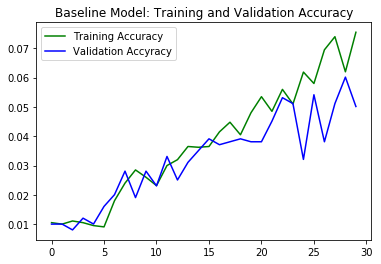

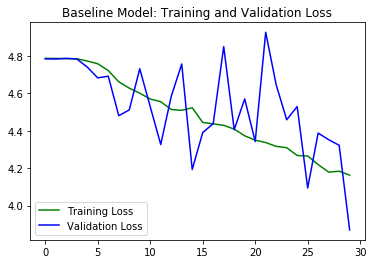

Baseline Model Training Time: 2:59:53.216275


In [11]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accyracy')
plt.title('Baseline Model: Training and Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Baseline Model: Training and Validation Loss')
plt.legend()
plt.show()

end = datetime.datetime.now()
elapsed = end - start
print('Baseline Model Training Time: {}'.format(elapsed))

model.save('Baseline_Model.h5')

In [12]:
import numpy as np

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical',
        shuffle=False)

test_loss, test_acc = model.evaluate_generator(test_generator, steps=54)
y_hat_test = model.predict_generator(test_generator, steps=54)
print('Predictions Generated: {}'.format(len(y_hat_test)))
print('Test Accuracy:', test_acc)

y_hat_test_vect = np.argmax(y_hat_test, axis=1)
y_true = test_generator.classes
matches = 0
for act, pred in list(zip(y_true, y_hat_test_vect)):
    if act == pred:
        matches += 1
    else:
        continue
acc = matches / len(y_true)
print('Matches: {} \nAccuracy: {}%'.format(matches, round(acc*100, 2)))

Found 1078 images belonging to 120 classes.
Predictions Generated: 1078
Test Accuracy: 0.051020409911870956
Matches: 55 
Accuracy: 5.1%


## Loading a Pretrained CNN

## Feature Engineering with the Pretrained Model

As you may well have guessed, adapting a pretrained model will undoubtedly produce better results then a fresh CNN due to the limited size of training data. Import a pretrained model such as VGG19 to use a convolutional base. Use this to transform the dataset into a rich feature space and add a few fully connected layers on top of the pretrained layers to build a classification model. (Be sure to leave the pretrained model frozen!)

In [14]:
# Your code here; add fully connected layers on top of the convolutional base
from keras.applications import VGG19

cnn_base = VGG19(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

model = models.Sequential()
model.add(cnn_base)
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(120, activation='sigmoid'))

cnn_base.trainable = False # freeze pretrained model
for layer in model.layers:
    print(layer.name, layer.trainable)
print(len(model.trainable_weights))

model.summary()

80142336/80134624 [==============================] - 24s 0us/step
vgg19 False
flatten_2 True
dense_6 True
dense_7 True
dense_8 True
dense_9 True
dense_10 True
10
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                524352    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_8 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_9 (Dense)         

In [15]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(150, 150), 
        batch_size = 20,
        class_mode = 'categorical') 

val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_dir, 
        target_size=(150, 150), 
        batch_size = 20,
        class_mode = 'categorical')

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
              train_generator,
              steps_per_epoch = 27,
              epochs = 10,
              validation_data = val_generator,
              validation_steps = 10)

end = datetime.datetime.now()
elapsed = end - start
print('Pretrained Model Training Time: {}'.format(elapsed))

Found 8127 images belonging to 120 classes.
Found 1017 images belonging to 120 classes.
Epoch 1/10
27/27 [==============================] - 294s 11s/step - loss: 4.7922 - acc: 0.0074 - val_loss: 4.7918 - val_acc: 0.0000e+00
Epoch 2/10
27/27 [==============================] - 294s 11s/step - loss: 4.7757 - acc: 0.0152 - val_loss: 4.8016 - val_acc: 0.0200
Epoch 3/10
27/27 [==============================] - 300s 11s/step - loss: 4.7856 - acc: 0.0056 - val_loss: 4.7716 - val_acc: 0.0100
Epoch 4/10
27/27 [==============================] - 300s 11s/step - loss: 4.7881 - acc: 0.0074 - val_loss: 4.7742 - val_acc: 0.0150
Epoch 5/10
27/27 [==============================] - 300s 11s/step - loss: 4.7893 - acc: 0.0037 - val_loss: 4.7699 - val_acc: 0.0000e+00
Epoch 6/10
27/27 [==============================] - 300s 11s/step - loss: 4.7903 - acc: 0.0074 - val_loss: 4.7940 - val_acc: 0.0102
Epoch 7/10
27/27 [==============================] - 301s 11s/step - loss: 4.7841 - acc: 0.0111 - val_loss: 4.787

## Visualize History

Now fit the model and visualize the training and validation accuracy/loss functions over successive epochs.

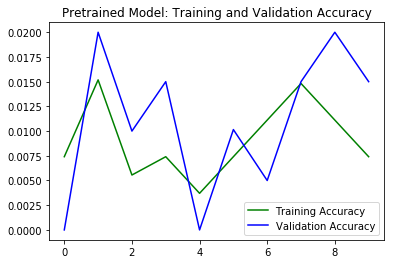

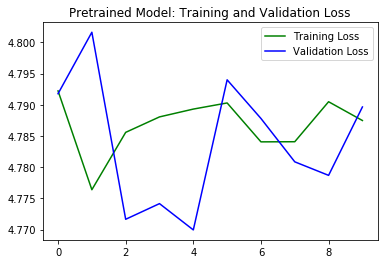

In [17]:
# Your code here; visualize the training / validation history associated with fitting the model.
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Pretrained Model: Training and Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Pretrained Model: Training and Validation Loss')
plt.legend()
plt.show()

In [18]:
# Save model
import pickle

model.save('VGG19_Pretrained_Model.h5')
with open('VGG19PretrainedModel_HistoryEpochs.pickle', 'wb') as f:
    pickle.dump(history, f, pickle.HIGHEST_PROTOCOL)

## Final Model Evaluation

Now that you've trained and validated the model, perform a final evaluation of the model on the test set.

In [20]:
# Your code here
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical',
        shuffle=False)

test_loss, test_acc = model.evaluate_generator(test_generator, steps=54)
y_hat_test = model.predict_generator(test_generator, steps=54)
print('Predictions Generated: {}'.format(len(y_hat_test)))
print('Test Accuracy:', test_acc)

y_hat_test_vect = np.argmax(y_hat_test, axis=1)
y_true = test_generator.classes
matches = 0
for act, pred in list(zip(y_true, y_hat_test_vect)):
    if act == pred:
        matches += 1
    else:
        continue
acc = matches / len(y_true)
print('Matches: {} \nAccuracy: {}%'.format(matches, round(acc*100, 2)))

Found 1078 images belonging to 120 classes.
Predictions Generated: 1078
Test Accuracy: 0.011131725274026394
Matches: 12 
Accuracy: 1.11%


## Summary

Congratulations! In this lab, you brought all of your prior deep learning skills together from preprocessing including one-hot encoding, to adapting a pretrained model. There are always ongoing advancements in CNN architectures and best practices, but you have a solid foundation and understanding at this point.